## HUMAN TVB-AdEx multi-scale model simulating neural activity during different brain states - anesthesia- effect of tau_e
###### *This code has been prepared by Lionel Kusch, Núria Tort-Colet, and Jennifer Goldman*
###### *Supervised by Alain Destexhe* 
###### Adapted by MS


#### Install (if necessary) some dependencies

In [1]:
#they are already installed
%%capture --no-display
!pip install moviepy
!pip install --upgrade tvb-library
!pip install --upgrade tvb-data

UsageError: Line magic function `%%capture` not found.


In [1]:

## Some lines to get centered plots:

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
%matplotlib inline

#### Import Human-TVB files and other tools

In [1]:
from tvb.analyzers import node_coherence

/DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [2]:
#Load the result of one simulation
FR_exc = []
FR_inh = []
Ad_exc = []
'''load result'''
folder_root ="./result/brain_states/b_e_tau_e/T_20_fedeP/analysis_dur/eli_-65_ele_-64/Iext_0.315/"
sim_name = '_b_e_80_Iext_0.000315_tau_e_3.75_El_e_-64.0_El_i_-65.0_nseed_0'

cut_transient = 2000
run_sim = 7000
# folder_root ="./result/brain_states/b_e_tau_i/T_20_fedeP/analysis_dur/eli_-65_ele_-64/Iext_0.315/"
# sim_name = '_b_e_120_tau_i_5.0_Iext_0.000315_El_e_-64.0_El_i_-65.0_nseed_4'
# sim_name = "_b_e_30_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0_nseed_0"
print ('... loading file: ' + sim_name)       
file_name = folder_root + sim_name
result = tools.get_result(file_name,cut_transient,run_sim)

##These are the state variables of the model
#0 excitatory,
#1 inhibitory
#2 std excitatory, 
#3 covariation of ex and in, 
#4 std inhibitory, 
#5 adaptation excitatory, 
#6 adaptation inhibitory
#7 noise 

'''fill variables'''
time_s = result[0][0]*1e-3 #from ms to sec
FR_exc=result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
FR_inh=result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate

del result

... loading file: _b_e_80_Iext_0.000315_tau_e_3.75_El_e_-64.0_El_i_-65.0_nseed_0


NameError: name 'tools' is not defined

In [7]:
dir(node_coherence)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_coherence',
 '_hamming',
 'calculate_cross_coherence',
 'coherence_mlab',
 'detrend_linear',
 'get_logger',
 'log',
 'mlab',
 'narray_describe',
 'numpy',
 'spectral']

In [10]:
node_coherence.calculate_cross_coherence(FR_exc, 256)

AttributeError: 'numpy.ndarray' object has no attribute 'sample_rate'

In [3]:

## Import TVB files:
# parameter_M_Berlin_new has the P_coeff that fede sent and also EL_e = -65, EL_e = -64, T=20
from tvb_model_reference.simulation_file.parameter.parameter_M_Berlin_new import Parameter
parameters = Parameter()

import tvb_model_reference.src.nuu_tools_simulation_human as tools
from tvb_model_reference.view.plot_human import multiview, multiview_one, prepare_surface_regions_human, animation_nuu

## Import tools:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import time
from IPython.display import Video
 

/DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


#### Plot one region in the cortical surface

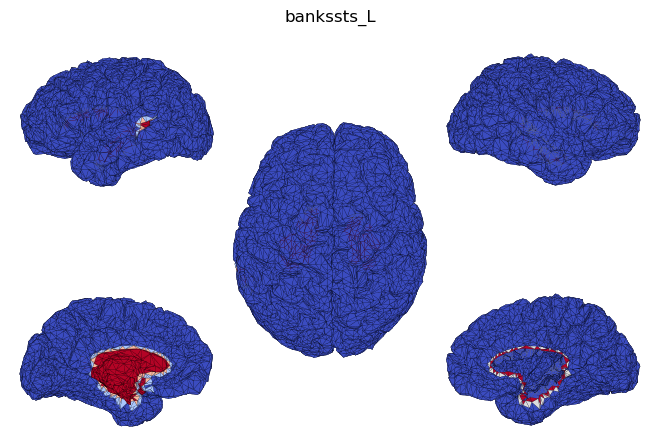

In [4]:

## Highlight one of the cortical regions of the model:

# prepare surface plot:
cortex, conn, hemispheres_left, hemispheres_right =\
prepare_surface_regions_human(parameters, 
                              conn_filename='Connectivity.zip', 
                              zip_filename= 'Surface_Cortex.zip', 
                              region_map_filename = 'RegionMapping.txt')


# chose a region by its name or by region number: (find all names at conn.region_labels)
id_region = 0
region_name = conn.region_labels[id_region]


# plot the region
the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))
multiview_one(cortex, hemispheres_left, hemispheres_right, 
              [id_region], the_data, plt.figure(), suptitle='', 
              title=region_name, figsize=(8, 8), shaded=False)


In [5]:
len(conn.region_labels)

68

In [16]:
a = []
a.append((1,2,3))

In [19]:
a = [1,2,3]

np.mean(a)

2.0

In [12]:
BREAK = False
for i in [0 ,1,2]:
    print("i = ", i)
    for j in [0,2,3,4,5,6,7]:
        print("j=",j)
        if BREAK:
            BREAK = False
            break
        for k in [1,2,3,4,5]:
            print("k=",k)
            if k==2:
                BREAK = True# here I want to go to the next j
                break
            else:
                BREAK = False
            
        

i =  0
j= 0
k= 1
k= 2
j= 2
i =  1
j= 0
k= 1
k= 2
j= 2
i =  2
j= 0
k= 1
k= 2
j= 2


In [5]:
conn.ordered_labels

array(['bankssts_L', 'bankssts_R', 'caudalanteriorcingulate_L',
       'caudalanteriorcingulate_R', 'caudalmiddlefrontal_L',
       'caudalmiddlefrontal_R', 'cuneus_L', 'cuneus_R', 'entorhinal_L',
       'entorhinal_R', 'frontalpole_L', 'frontalpole_R', 'fusiform_L',
       'fusiform_R', 'inferiorparietal_L', 'inferiorparietal_R',
       'inferiortemporal_L', 'inferiortemporal_R', 'insula_L', 'insula_R',
       'isthmuscingulate_L', 'isthmuscingulate_R', 'lateraloccipital_L',
       'lateraloccipital_R', 'lateralorbitofrontal_L',
       'lateralorbitofrontal_R', 'lingual_L', 'lingual_R',
       'medialorbitofrontal_L', 'medialorbitofrontal_R',
       'middletemporal_L', 'middletemporal_R', 'paracentral_L',
       'paracentral_R', 'parahippocampal_L', 'parahippocampal_R',
       'parsopercularis_L', 'parsopercularis_R', 'parsorbitalis_L',
       'parsorbitalis_R', 'parstriangularis_L', 'parstriangularis_R',
       'pericalcarine_L', 'pericalcarine_R', 'postcentral_L',
       'postcentra

In [4]:
dir(conn)

['TYPES_TO_DEEPCOPY',
 '__abstractmethods__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__doc_old__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_own_declarative_attrs',
 '_own_declarative_props',
 '_read',
 '_repr_html_',
 'areas',
 'binarized_weights',
 'centres',
 'centres_annular',
 'centres_cubic',
 'centres_spherical',
 'centres_toroidal',
 'compute_region_labels',
 'compute_tract_lengths',
 'configure',
 'cortical',
 'create_region_labels',
 'delays',
 'duplicate',
 'from_bytes_stream',
 'from_file',
 'generate_surrogate_connectivity',
 'get_default_selection',
 'get_grouped_space_labels',
 'gid',
 'hemisphere_order_indices',
 'hemispheres',
 'horizon',
 'idelays',

In [5]:
print (conn.region_labels[10:24])

['frontalpole_L' 'frontalpole_R' 'fusiform_L' 'fusiform_R'
 'inferiorparietal_L' 'inferiorparietal_R' 'inferiortemporal_L'
 'inferiortemporal_R' 'insula_L' 'insula_R' 'isthmuscingulate_L'
 'isthmuscingulate_R' 'lateraloccipital_L' 'lateraloccipital_R']


#### Set up the parameters of the simulation

In [5]:
## TAU E
## Set the parameters of the simulation:

run_sim = 7000.0 # ms, length of the simulation
cut_transient = 2000.0 # ms, length of the discarded initial segment

# List of values of adaptation strength and tau_e which will vary the brain state
# bvals = [5, 20, 30, 40, 80]
bvals = [5]
tau_es = [ 4.0]


#simname = ['asynchronous','synchronous']
Iexts = [0.000315] # External input


## Set the parameters of the stimulus (choose stimval = 0 to simulate spontaneous activity)

stimval = 0 #  stimulus strength
stimdur = 50 # ms, duration of the stimulus
stimtime_mean = 2500. # ms, time after simulation start (it will be shufled)
stim_region = 5 # .
# stim_region =   # .


#### Define a location to save the simulations

In [12]:
folder_root = "./result/brain_states/b_e_tau_e/T_20_fedeP/analysis_dur/"

try:
    os.listdir(folder_root)
except:
    os.mkdir(folder_root)

#### Set up the simulator

In [7]:
parameters.parameter_monitor['Bold'] = True

In [13]:
## Set up the simulator:


simulator = tools.init(parameters.parameter_simulation,
                          parameters.parameter_model,
                          parameters.parameter_connection_between_region,
                          parameters.parameter_coupling,
                          parameters.parameter_integrator,
                          parameters.parameter_monitor)


type of noise:  <class 'tvb.simulator.noise.Additive'> 
and noise:  Additive(dt=None, ntau=0)


In [6]:
parameters.parameter_simulation

{'path_result': './result/synch/', 'seed': 10, 'save_time': 1000.0}

#### Run simulation (it takes a while)

In [14]:
parameters.parameter_model['E_L_e']

-64.0

In [8]:
parameters.parameter_model['T']

20.0

In [19]:
## Simulations with ranging tau_is, and b
## Don't run this cell if you already have the simulation files stored
 ## Uncomment this cell to run a new simulation (i.e., if you change the parameters)

Nseeds = [0]
start_time = time.time()
simbe=0
# Loop over b_e, external_input, and tau_e
for nseed in range(0,1):

    for simnum in range(len(Iexts)):

        for tau_val in range(len(tau_es)):

            print(f"b_e = {bvals[simbe]}, tau_e = {tau_es[tau_val]}, Iext = {Iexts[simnum]}")

#             parameters.parameter_model['b_e'] = bvals[simbe]
            parameters.parameter_model['b_e'] = bvals[simbe]

            parameters.parameter_model['tau_e'] = tau_es[tau_val]

            parameters.parameter_model['external_input_ex_ex']=Iexts[simnum]
            parameters.parameter_model['external_input_in_ex']=Iexts[simnum]

            # parameters for stimulus
            weight = list(np.zeros(simulator.number_of_nodes))
            weight[stim_region] = stimval # region and stimulation strength of the region 0 

            parameters.parameter_stimulus["tau"]= stimdur # stimulus duration [ms]
            parameters.parameter_stimulus["T"]= 1e9 # interstimulus interval [ms]
            parameters.parameter_stimulus["weights"]= weight
            parameters.parameter_stimulus["variables"]=[0] #variable to kick

            parameters.parameter_stimulus['onset'] = cut_transient + 0.5*(run_sim-cut_transient)
            stim_time = parameters.parameter_stimulus['onset']
            stim_steps = stim_time*10 #number of steps until stimulus
            
            # make folder directories in the form folder_root/eli_{eli}_ele_{ele}/Iext_{iext}/
            eli = int(parameters.parameter_model['E_L_i'])
            ele = int(parameters.parameter_model['E_L_e'])
            fel = f"/eli_{eli}_ele_{ele}"
            fiext = Iexts[simnum]*1000

            ffolder_root = folder_root + fel + f'/Iext_{fiext}' 
            try:
                os.listdir(ffolder_root)
            except:
                os.makedirs(ffolder_root)

            parameters.parameter_simulation['path_result'] = ffolder_root + '/' + '_b_e_'+str(bvals[simbe]) + '_Iext_'+str(Iexts[simnum])+ "_tau_e_" + str(tau_es[tau_val])+ "_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])+ f"_nseed_{nseed}"+ '/'
            simulator = tools.init(parameters.parameter_simulation,
                               parameters.parameter_model,
                               parameters.parameter_connection_between_region,
                               parameters.parameter_coupling,
                               parameters.parameter_integrator,
                               parameters.parameter_monitor,
                               parameter_stimulation=parameters.parameter_stimulus,
                                  my_seed=nseed)
            if stimval:
                print ('    Stimulating for {1} ms, {2} nS in the {0}\n'.format(simulator.connectivity.region_labels[stim_region],parameters.parameter_stimulus['tau'],stimval))

            tools.run_simulation(simulator,
                     run_sim,                            
                     parameters.parameter_simulation,
                     parameters.parameter_monitor)

end_time = time.time()
total_time = end_time - start_time
print("total time for the simulation is ", total_time/60, " min")

b_e = 30, tau_e = 4.0, Iext = 0.000315


IndexError: list index out of range

In [10]:
tau_es

[4.5, 4.0, 3.75]

In [15]:
## Simulations with ranging tau_is, and b
## Don't run this cell if you already have the simulation files stored
 ## Uncomment this cell to run a new simulation (i.e., if you change the parameters)

Nseeds = 20
start_time = time.time()
simbe=0
# Loop over b_e, external_input, and tau_e
for nseed in range(0,1):
    print(f"seed = {nseed}")

    for simnum in range(len(Iexts)):

        for tau_val in range(len(tau_es)):

            print(f"b_e = {bvals[simbe]}, tau_e = {tau_es[tau_val]}, Iext = {Iexts[simnum]}")

#             parameters.parameter_model['b_e'] = bvals[simbe]
            parameters.parameter_model['b_e'] = bvals[simbe]

            parameters.parameter_model['tau_e'] = tau_es[tau_val]

            parameters.parameter_model['external_input_ex_ex']=Iexts[simnum]
            parameters.parameter_model['external_input_in_ex']=Iexts[simnum]

            # parameters for stimulus
            weight = list(np.zeros(simulator.number_of_nodes))
            weight[stim_region] = stimval # region and stimulation strength of the region 0 

            parameters.parameter_stimulus["tau"]= stimdur # stimulus duration [ms]
            parameters.parameter_stimulus["T"]= 1e9 # interstimulus interval [ms]
            parameters.parameter_stimulus["weights"]= weight
            parameters.parameter_stimulus["variables"]=[0] #variable to kick

            parameters.parameter_stimulus['onset'] = cut_transient + 0.5*(run_sim-cut_transient)
            stim_time = parameters.parameter_stimulus['onset']
            stim_steps = stim_time*10 #number of steps until stimulus
            
            # make folder directories in the form folder_root/eli_{eli}_ele_{ele}/Iext_{iext}/
            eli = int(parameters.parameter_model['E_L_i'])
            ele = int(parameters.parameter_model['E_L_e'])
            fel = f"/eli_{eli}_ele_{ele}"
            fiext = Iexts[simnum]*1000

            ffolder_root = folder_root + fel + f'/Iext_{fiext}' 
            try:
                os.listdir(ffolder_root)
            except:
                os.makedirs(ffolder_root)

            parameters.parameter_simulation['path_result'] = ffolder_root + '/' + '_b_e_'+str(bvals[simbe]) + '_Iext_'+str(Iexts[simnum])+ "_tau_e_" + str(tau_es[tau_val])+ "_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])+ f"_nseed_{nseed}"+ '/'
            simulator = tools.init(parameters.parameter_simulation,
                               parameters.parameter_model,
                               parameters.parameter_connection_between_region,
                               parameters.parameter_coupling,
                               parameters.parameter_integrator,
                               parameters.parameter_monitor,
                               parameter_stimulation=parameters.parameter_stimulus,
                                  my_seed=nseed)
            if stimval:
                print ('    Stimulating for {1} ms, {2} nS in the {0}\n'.format(simulator.connectivity.region_labels[stim_region],parameters.parameter_stimulus['tau'],stimval))

            tools.run_simulation(simulator,
                     run_sim,                            
                     parameters.parameter_simulation,
                     parameters.parameter_monitor)

end_time = time.time()
total_time = end_time - start_time
print("total time for the simulation is ", total_time/60, " min")

seed = 0
b_e = 5, tau_e = 4.0, Iext = 0.000315
type of noise:  <class 'tvb.simulator.noise.Additive'> 
and noise:  Additive(dt=None, ntau=0)
simulation time :1000.0


/DATA/Maria/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
simulation time :5000.0
simulation time :6000.0
simulation time :7000.0
total time for the simulation is  4.600488050778707  min


#### Load simulation results

In [ ]:
i

In [48]:
Iexts = [0.000315]
eli = int(-65.0)
ele = int(-64.0)
fel = f"/eli_{eli}_ele_{ele}"
fiext = Iexts[0]*1000

folder_root = "./result/brain_states/b_e_tau_e/T_20_fedeP/analysis_dur/"
# folder_root = "./result/brain_states/b_e_tau_i/T_20_fedeP/"

ffolder_root = folder_root + fel + f'/Iext_{fiext}' 

# sorted(os.listdir(ffolder_root))

In [46]:
# Choose the parameters of the results that you want to load
bvals = [20, 30, 40, 60]
tau_es = [5.0, 4.5,4.0,3.75]
Iexts = [0.000315]

In [14]:
# Choose the parameters of the results that you want to load
bvals = [120]
tau_es = [4.5, 4.0,3.75]
Iexts = [0.000315]

In [4]:
import tvb_model_reference.src.nuu_tools_simulation_human as tools

/DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [5]:
cut_transient = 2000
run_sim = 5000 

In [23]:
ffolder_root="/DATA/Maria/Anesthetics/result/brain_states/b_e_tau_i/T_20_fedeP/analysis_dur/eli_-65_ele_-64/Iext_0.315/"

In [49]:
## Load simulation variables:



FR_exc = []
FR_inh = []
Ad_exc = []

nseed = 0

for simbe in range(len(bvals)):
    for simnum in range(len(Iexts)):
        for tau_val in range(len(tau_es)):
#             sim_name = '_b_e_'+str(bvals[simbe]) + '_Iext_'+str(Iexts[simnum])+ "_tau_e_" + str(tau_es[tau_val])+ "_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])+ '/'
#             sim_name = '_b_e_'+str(bvals[simbe]) + '_Iext_'+str(Iexts[simnum])+ "_tau_e_" + str(tau_es[tau_val])+ "_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])+ f"_nseed_{nseed}"+ '/'
            sim_name = '_b_e_'+str(bvals[simbe]) + '_Iext_'+str(Iexts[simnum])+ "_tau_e_" + str(tau_es[tau_val])+ \
    "_El_e_" + str(-64.0)+ "_El_i_" + str(-65.0)+ f"_nseed_{nseed}"+ '/'
#             sim_name = '_b_e_'+str(bvals[simbe]) +  '_Iext_'+str(Iexts[simnum])+ "_tau_i_" + str(tau_es[tau_val])+\
#     "_El_e_" + str(-64.0)+ "_El_i_" + str(-65.0)+ '/'
        
#             sim_name = f"_b_e_{bvals[simbe]}_tau_i_{tau_es[tau_val]}_Iext_0.000315_El_e_-64.0_El_i_-65.0_nseed_{nseed}"

            '''load result'''
            print ('... loading file: ' +  sim_name)       
            file_name =  ffolder_root + '/' + sim_name
            result = tools.get_result(file_name,cut_transient,run_sim)

            '''fill variables'''
            time_s = result[0][0]*1e-3 #from ms to sec
            FR_exc.append(result[0][1][:,0,:]*1e3) # from KHz to Hz; Excitatory firing rate
            FR_inh.append(result[0][1][:,1,:]*1e3) # from KHz to Hz; Inhibitory firing rate
#             Ad_exc.append(result[0][1][:,5,:]) # nA; Excitatory adaptation
            
            del result

... loading file: _b_e_20_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_20_Iext_0.000315_tau_e_4.5_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_20_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_20_Iext_0.000315_tau_e_3.75_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_30_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_30_Iext_0.000315_tau_e_4.5_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_30_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_30_Iext_0.000315_tau_e_3.75_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_40_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_40_Iext_0.000315_tau_e_4.5_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_40_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_40_Iext_0.000315_tau_e_3.75_El_e_-64.0_El_i_-65.0_nseed_0/
... loading file: _b_e_60

In [6]:
del Ad_exc

In [13]:
## Check shape of variables: [times, regions]:

np.shape(FR_inh) # [0] for b=5pA & tau_e=5.0ms; [1] for b=5pA & tau_e=4.5ms etc

(15, 30000, 68)

### Plot simulated time series

In [1]:
ffolder_root

NameError: name 'ffolder_root' is not defined

In [16]:
sys.getsizeof(FR_inh)

184

In [12]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

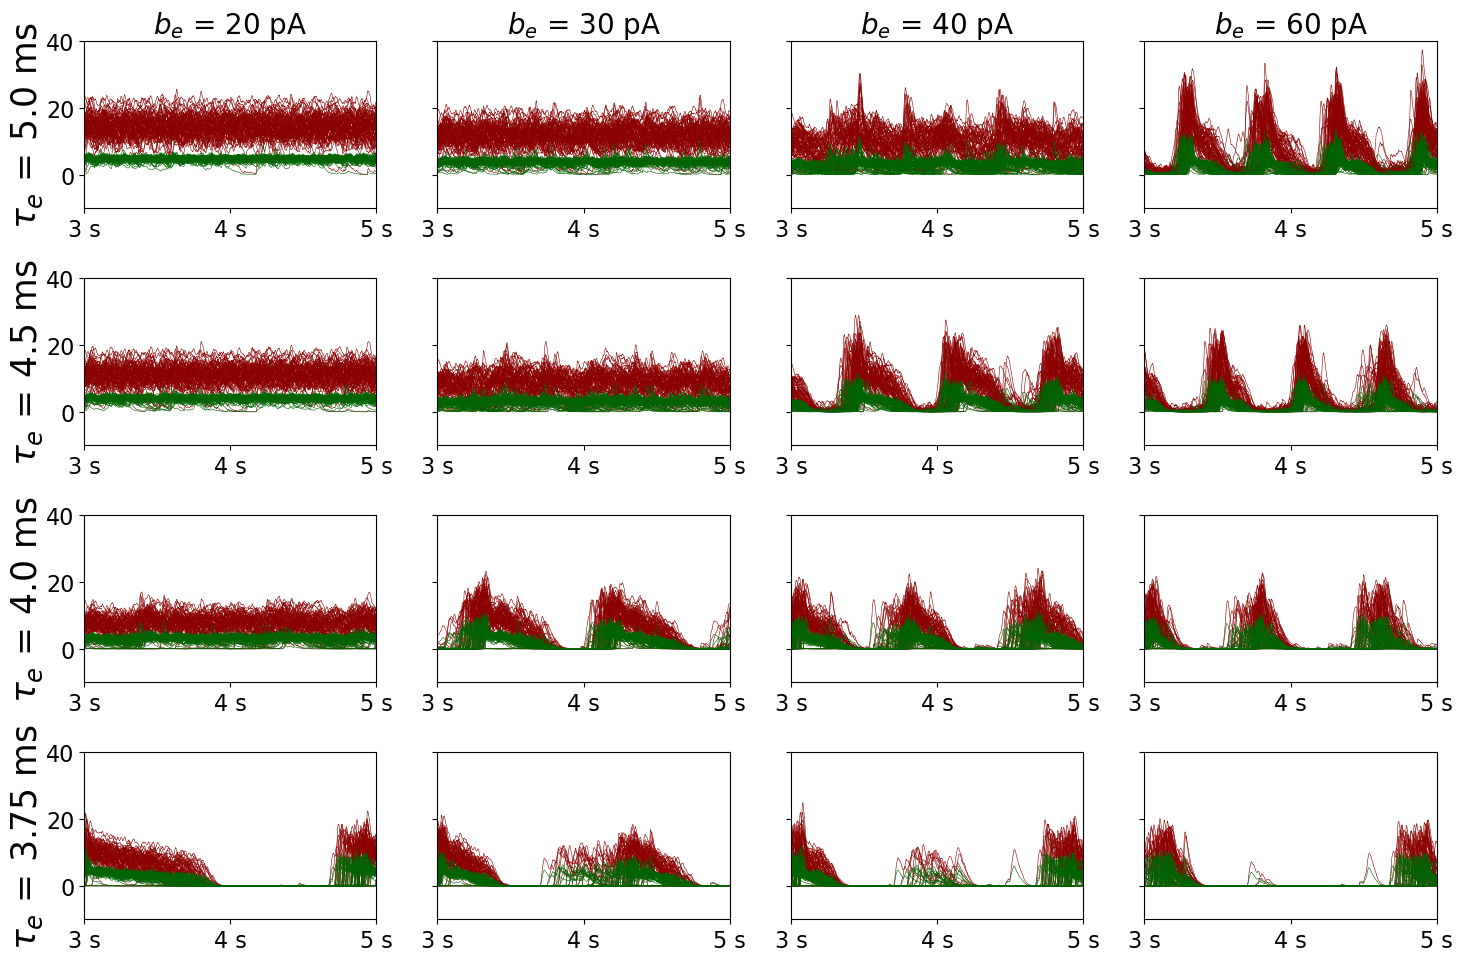

In [50]:
#%% plot simulation results for each b_e and tau_e value:

rows =int(len(tau_es))
cols =int(len(bvals))

fig, axes = plt.subplots(rows,cols,figsize=(15, 10), sharey=True)
# fig.subplots_adjust(hspace = 0.3, wspace=.4)

plt.rcParams.update({'font.size': 19})

for simbe in range(len(bvals)):
    for tau_val in range(len(tau_es)):

        '''plot traces'''
        axes[tau_val,simbe].plot(time_s,FR_inh[tau_val +  (rows*simbe)],color='darkred', linewidth=0.4) # [times, regions]
        axes[tau_val,simbe].plot(time_s,FR_exc[tau_val +  (rows*simbe)],color='darkgreen', linewidth=0.4) # [times, regions]

        #axes[1,simnum].plot(time_s,Ad_exc[simnum],color='goldenrod') # [times, regions]

#         axes[tau_val,simbe].set_xlabel('Time (s)', fontsize=16)
        #axes[1,simnum].set_xlabel('Time (s)')

#         axes[tau_val,simbe].set_ylabel('Firing rate (Hz)', fontsize=16)
        #axes[1,simnum].set_ylabel('Adaptation (nA)')

        if tau_val == 0:
            axes[tau_val,simbe].set_title(fr'$b_e$ = {bvals[simbe]} pA',\
#                                           +'\n'+fr'$\tau_e$ = {tau_es[tau_val]} ms',\
                                          fontsize=20)
        if simbe == 0:
            axes[tau_val,simbe].set_ylabel(fr'$\tau_e$ = {tau_es[tau_val]} ms', fontsize=25, labelpad = 0.5)
#         else:
#             axes[tau_val,simbe].set_title(r'$\tau_e$ = {0} ms'.format(tau_es[tau_val]), fontsize=20)

        axes[tau_val,simbe].set_ylim([-10,40])
#         axes[tau_val,simbe].legend([Li[0], Le[0]], ['Inh.','Exc.'], loc='upper right', fontsize='xx-small')

for ax in axes.reshape(-1):
    ax.set_xlim([3,5])
#     ax.set_ylim(-2, 30)
    ax.set_xticks([3,4,5])
    ax.xaxis.set_tick_params(labelsize=16)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d s'))
    ax.yaxis.set_tick_params(labelsize=16)
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
            
# ele= parameters.parameter_model['E_L_e']
# eli=parameters.parameter_model['E_L_i']
# fig.suptitle(f'Varying tau_e and b_e, Iext = {Iexts[0]}, fede_p, El_e= {ele}, El_i={eli}', fontsize=15)
plt.tight_layout()
title = f'Varying tau_e and b_e, Iext = {Iexts[0]}, fede_p, El_e= {ele}, El_i={eli}'
#plt.savefig(title+".png", bbox_inches='tight')
plt.show()

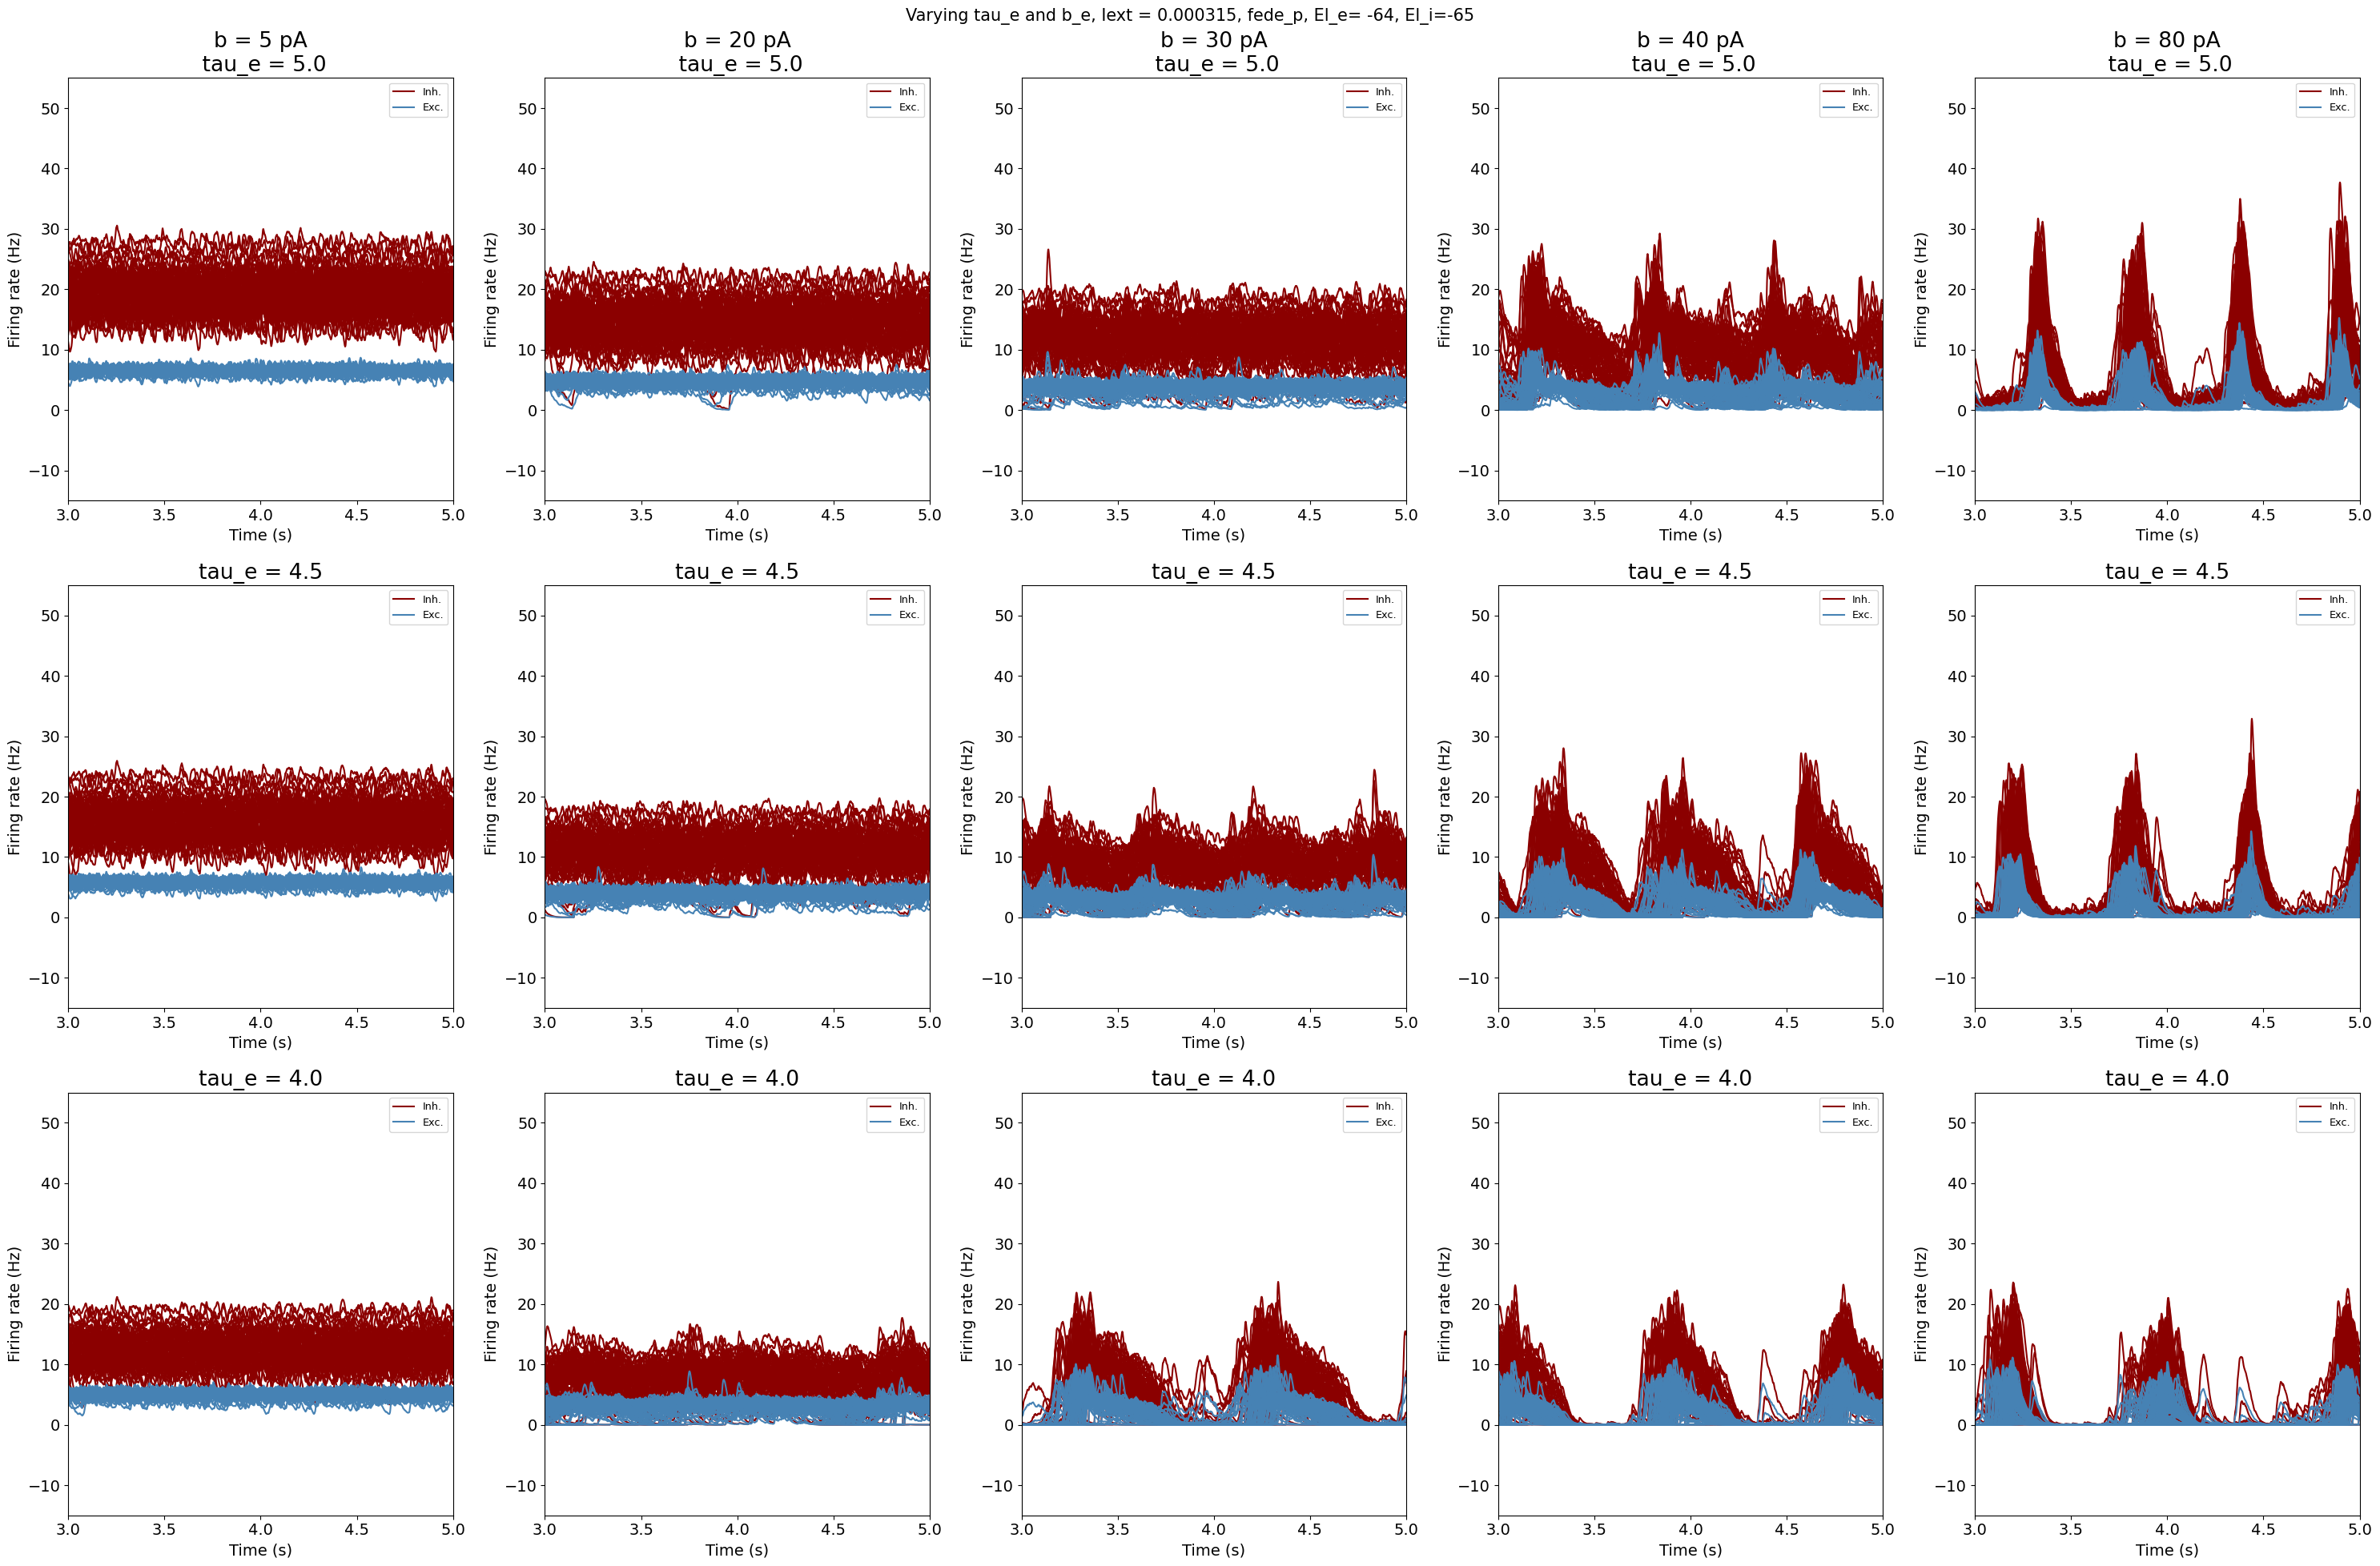

In [16]:
#%% plot simulation results for each b_e and tau_e value:

rows =int(len(tau_es))
cols =int(len(bvals))

fig, axes = plt.subplots(rows,cols,figsize=(30,20))
plt.rcParams.update({'font.size': 19})

for simbe in range(len(bvals)):
    for tau_val in range(len(tau_es)):

        '''plot traces'''
        Li = axes[tau_val,simbe].plot(time_s,FR_inh[tau_val +  (rows*simbe)],color='darkred') # [times, regions]
        Le = axes[tau_val,simbe].plot(time_s,FR_exc[tau_val +  (rows*simbe)],color='SteelBlue') # [times, regions]

        #axes[1,simnum].plot(time_s,Ad_exc[simnum],color='goldenrod') # [times, regions]

        axes[tau_val,simbe].set_xlabel('Time (s)', fontsize=16)
        #axes[1,simnum].set_xlabel('Time (s)')

        axes[tau_val,simbe].set_ylabel('Firing rate (Hz)', fontsize=16)
        #axes[1,simnum].set_ylabel('Adaptation (nA)')

        if tau_val == 0:
            axes[tau_val,simbe].set_title('b = {0} pA\n tau_e = {1}'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
        else:
            axes[tau_val,simbe].set_title('tau_e = {0}'.format(tau_es[tau_val]), fontsize=16)

        axes[tau_val,simbe].set_ylim([-15,55])
        axes[tau_val,simbe].legend([Li[0], Le[0]], ['Inh.','Exc.'], loc='upper right', fontsize='xx-small')

        for ax in axes.reshape(-1):
            ax.set_xlim([3,5])
            ax.set_xticks([3,3.5,4,4.5,5])
            
# ele= parameters.parameter_model['E_L_e']
# eli=parameters.parameter_model['E_L_i']
fig.suptitle(f'Varying tau_e and b_e, Iext = {Iexts[0]}, fede_p, El_e= {ele}, El_i={eli}', fontsize=15)
plt.tight_layout()
title = f'Varying tau_e and b_e, Iext = {Iexts[0]}, fede_p, El_e= {ele}, El_i={eli}'
#plt.savefig(title+".png", bbox_inches='tight')
plt.show()

In [28]:
rows

2

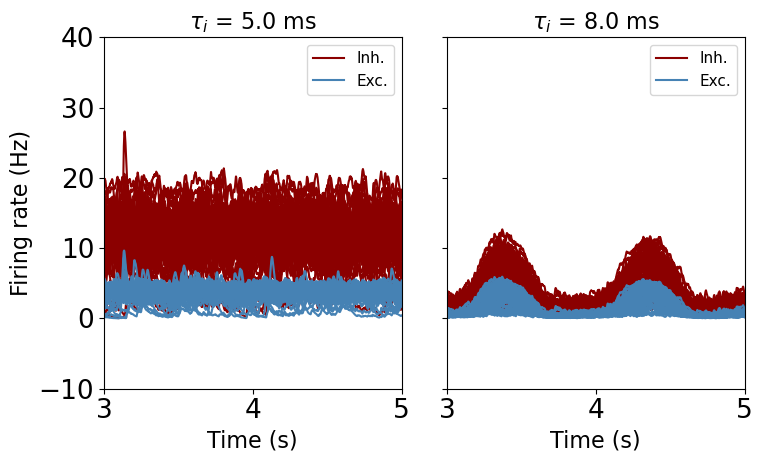

In [41]:
#%% plot simulation results for each b_e and tau_e value:

rows =int(len(tau_es))
cols =int(len(bvals))

fig, axes = plt.subplots(cols,rows,figsize=(8,5), sharey=True)
plt.rcParams.update({'font.size': 19})

for simbe in range(len(bvals)):
    for tau_val in range(len(tau_es)):

        '''plot traces'''
        axes[tau_val].plot(time_s,FR_inh[tau_val +  (rows*simbe)],color='darkred') # [times, regions]
        axes[tau_val].plot(time_s,FR_exc[tau_val +  (rows*simbe)],color='SteelBlue') # [times, regions]

        #axes[1,simnum].plot(time_s,Ad_exc[simnum],color='goldenrod') # [times, regions]

        axes[tau_val].set_xlabel('Time (s)', fontsize=16)
        #axes[1,simnum].set_xlabel('Time (s)')
        if tau_val == 0:
            axes[tau_val].set_ylabel('Firing rate (Hz)', fontsize=16)
        #axes[1,simnum].set_ylabel('Adaptation (nA)')

        
        axes[tau_val].set_title(r'$\tau_i$ = {1} ms'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
        
        axes[tau_val].set_ylim([-10,40])
        axes[tau_val].legend([Li[0], Le[0]], ['Inh.','Exc.'], loc='upper right', fontsize='xx-small')

for ax in axes.reshape(-1):
    ax.set_xlim([3,5])
    ax.set_xticks([3,4,5])
            
# ele= parameters.parameter_model['E_L_e']
# eli=parameters.parameter_model['E_L_i']
# fig.suptitle(f'Varying tau_e and b_e, Iext = {Iexts[0]}, fede_p, El_e= {ele}, El_i={eli}', fontsize=15)
plt.tight_layout()
title = f'Varying tau_e and b_e, Iext = {Iexts[0]}, fede_p, El_e= {ele}, El_i={eli}'
#plt.savefig(title+".png", bbox_inches='tight')
plt.show()

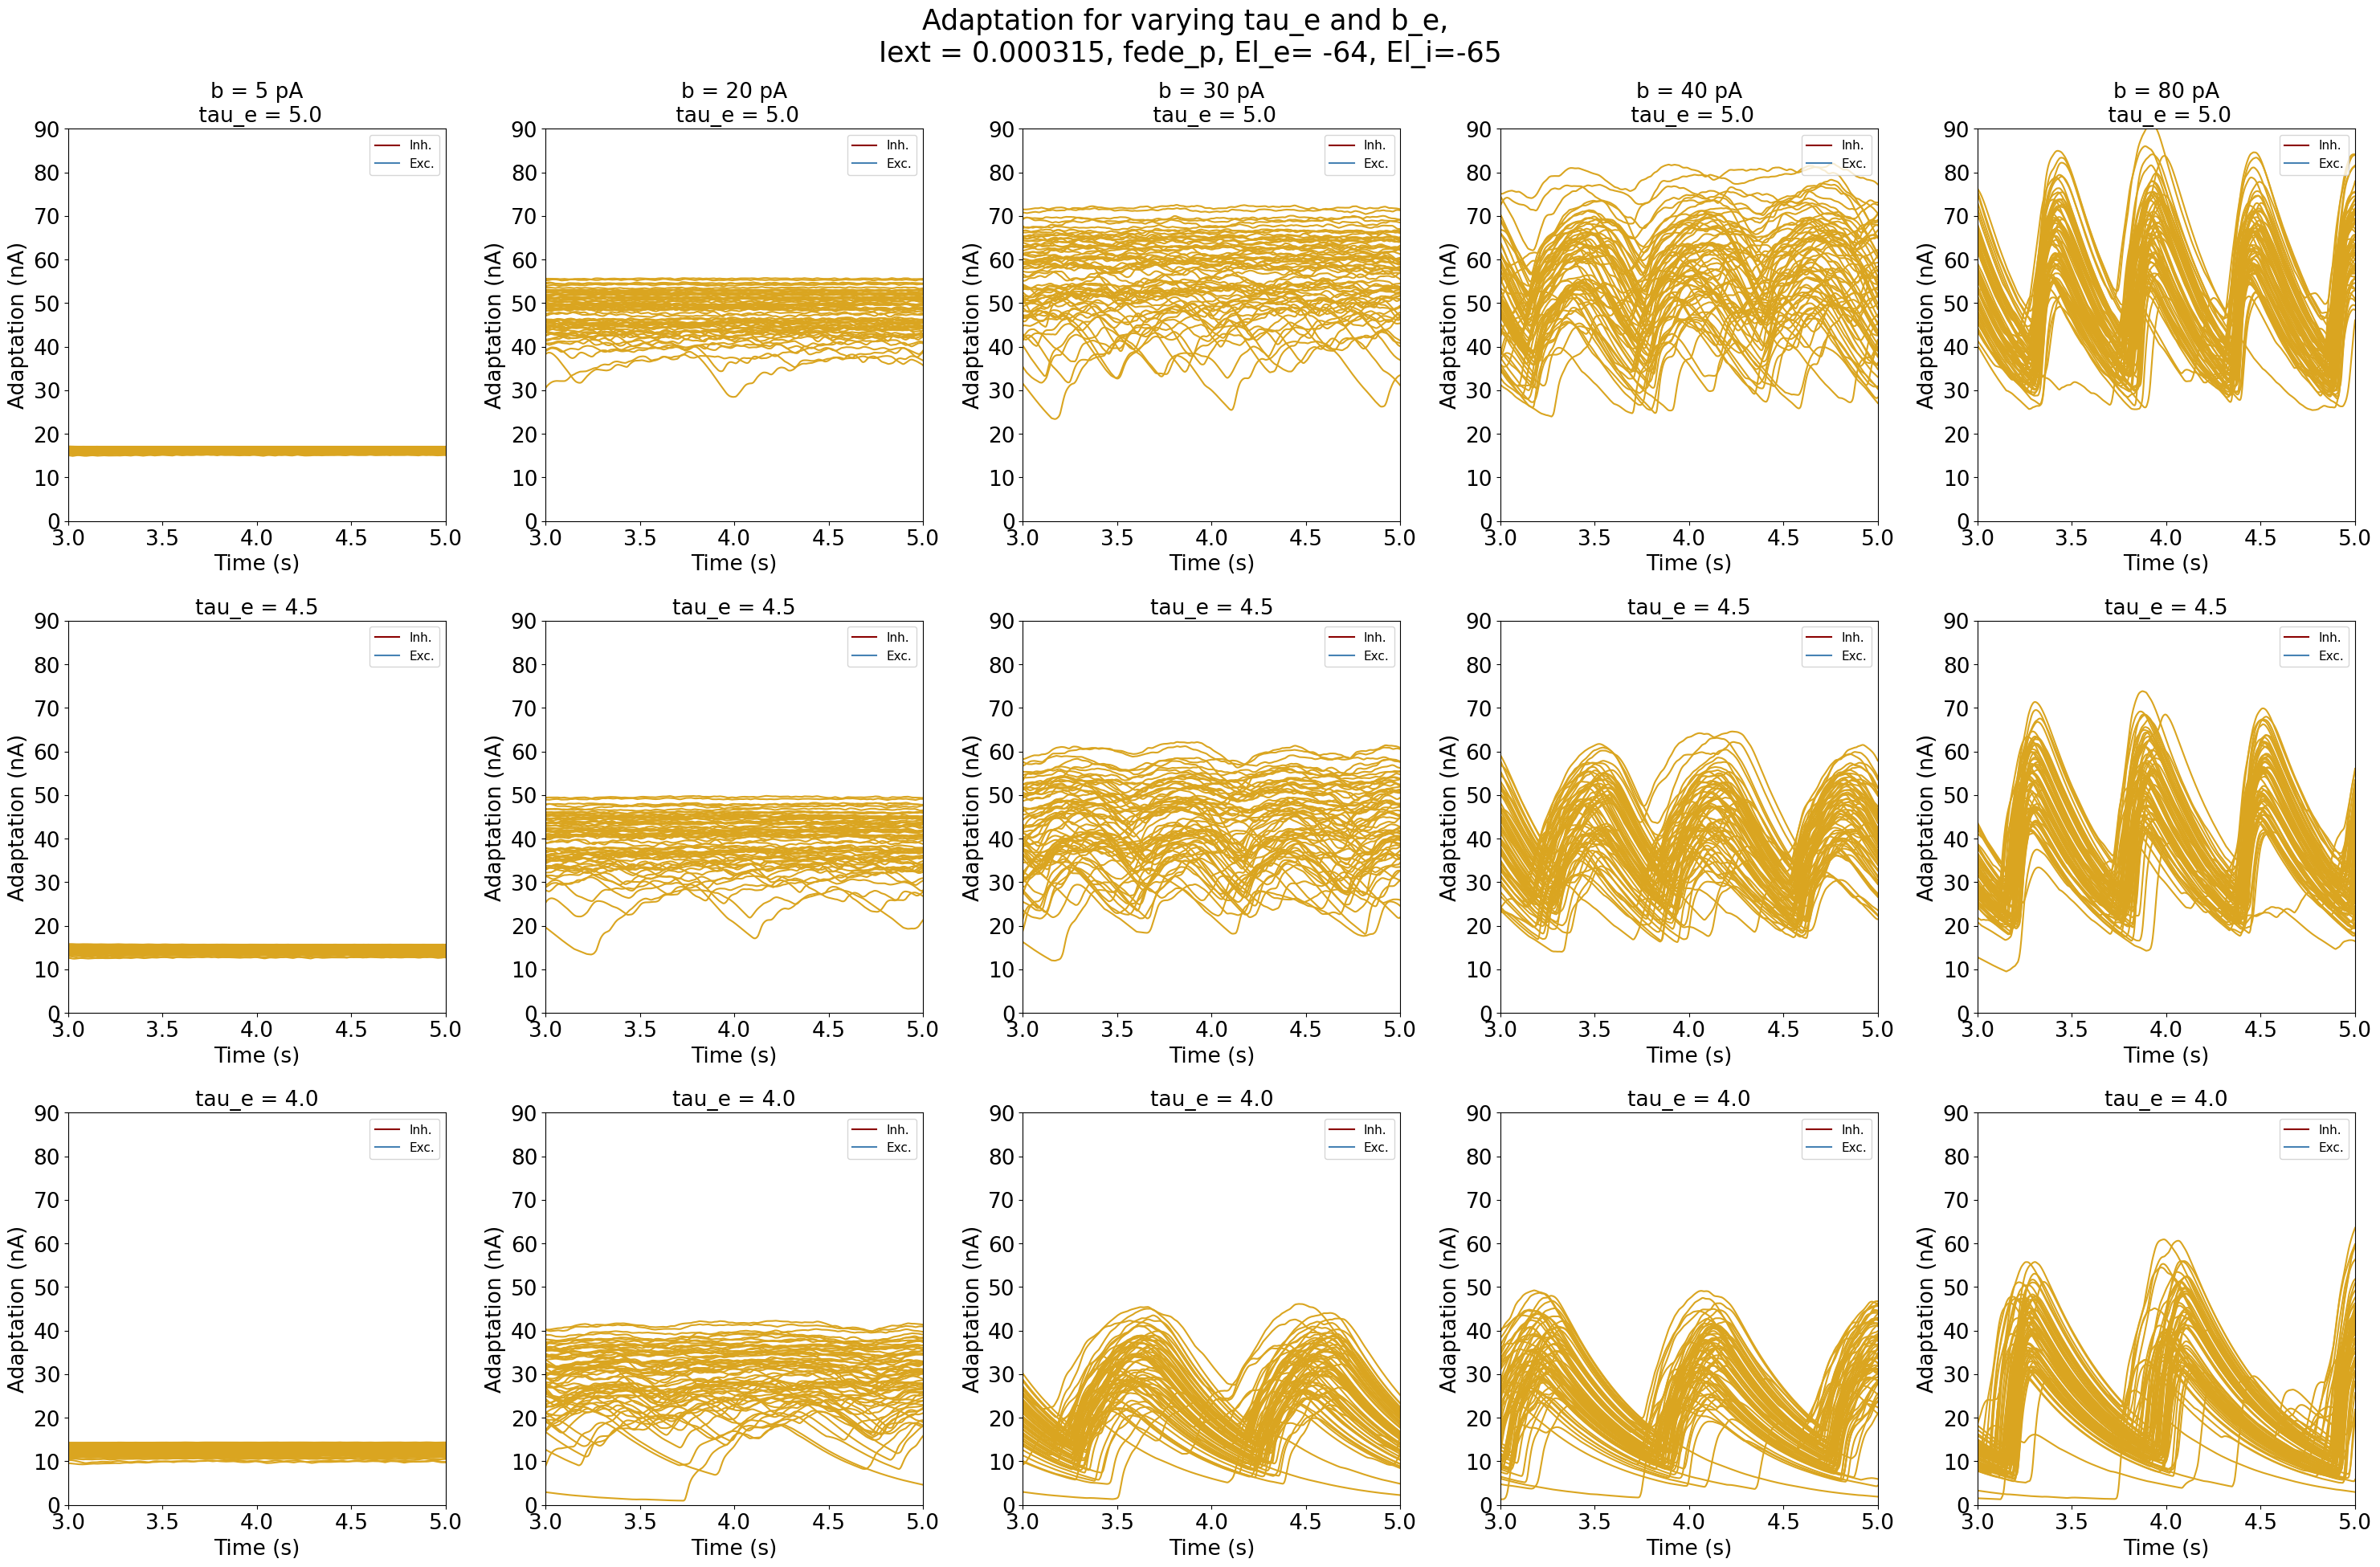

In [22]:
#%% plot simulation results for adaptation for each b_e and tau_e value:

rows =int(len(tau_es))
cols =int(len(bvals))

fig, axes = plt.subplots(rows,cols,figsize=(30,20))
plt.rcParams.update({'font.size': 19})

for simbe in range(len(bvals)):
    for tau_val in range(len(tau_es)):

        '''plot traces'''
        La = axes[tau_val,simbe].plot(time_s,Ad_exc[tau_val +  (rows*simbe)],color='goldenrod') # [times, regions]

        axes[tau_val,simbe].set_xlabel('Time (s)', fontsize=19)
 
        axes[tau_val,simbe].set_ylabel('Adaptation (nA)', fontsize=19)
        
        if tau_val == 0:
            axes[tau_val,simbe].set_title('b = {0} pA\n tau_e = {1}'.format(bvals[simbe],tau_es[tau_val]), fontsize=19)
        else:
            axes[tau_val,simbe].set_title('tau_e = {0}'.format(tau_es[tau_val]), fontsize=19)

        axes[tau_val,simbe].set_ylim([0, 90])
        axes[tau_val,simbe].legend([Li[0], Le[0]], ['Inh.','Exc.'], loc='upper right', fontsize='xx-small')

        for ax in axes.reshape(-1):
            ax.set_xlim([3,5])
            ax.set_xticks([3,3.5,4,4.5,5])
            
# ele= parameters.parameter_model['E_L_e']
# eli=parameters.parameter_model['E_L_i']
fig.suptitle(f'Adaptation for varying tau_e and b_e, \nIext = {Iexts[0]}, fede_p, El_e= {ele}, El_i={eli}', fontsize=25)
plt.tight_layout()
title = f'Adaptation Varying tau_e and b_e, Iext = {Iexts[0]}, fede_p, El_e= {ele}, El_i={eli}'
#plt.savefig(title+".png", bbox_inches='tight')
plt.show()

### Make a movie of each brain state

If it keeps crushing skip redoing frames by setting *use_old* = **True**

In [15]:
# Choose the parameters of the results that you want to make movies
bvals = [30]
tau_es = [5.0, 4.0]
Iexts = [0.000315]

## Load simulation variables for video:

FR_exc_vid = []


for simbe in range(len(bvals)):
    for simnum in range(len(Iexts)):
        for tau_val in range(len(tau_es)):
            sim_name = '_b_e_'+str(bvals[simbe]) + '_Iext_'+str(Iexts[simnum])+ "_tau_e_" + str(tau_es[tau_val])+ "_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])+ '/'
            
            print ('... loading file: ' +  sim_name)       
            file_name =  ffolder_root + '/' + sim_name
            result = tools.get_result(file_name,cut_transient,run_sim)

            '''fill variables'''
            time_s = result[0][0]*1e-3 #from ms to sec
            FR_exc_vid.append(result[0][1][:,0,:]*1e3) # from KHz to Hz; Excitatory firing rate
            

... loading file: _b_e_30_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_30_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0/


In [16]:

# prepare surface plot:

cortex, conn, hemispheres_left, hemispheres_right =\
prepare_surface_regions_human(parameters, 
                              conn_filename='Connectivity.zip', 
                              zip_filename= 'Surface_Cortex.zip', 
                              region_map_filename = 'RegionMapping.txt')


rows =int(len(tau_es))


for simbe in range(len(bvals)):
    for tau_val in range(len(tau_es)):

        factor = 200
        data = []
        for i, values in enumerate(FR_exc_vid[tau_val +  (rows*simbe)]): # for each time sample a vector of region values
            if  i % factor == 0:
                data.append(values[cortex.region_mapping])

        print ( len(data)*0.1*factor,'ms')        
        animation_nuu(cortex,hemispheres_left,hemispheres_right, data, 
                      file_name='./movie_b'+str(bvals[simbe])+'pA'+'tau_e'+str(tau_es[tau_val])+ 'ms.mp4', 
                      fps=10, my_dpi=100, factor=factor, label='Firing rate (Hz)',
                      use_old=False)



3000.0 ms
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

/DATA/Maria/Anesthetics/tvb_model_reference/view/plot_human.py:155: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure( dpi=my_dpi)


21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 Moviepy - Building video ./movie_b30pAtau_e5.0ms.mp4.
Moviepy - Writing video ./movie_b30pAtau_e5.0ms.mp4



Moviepy - Done !
Moviepy - video ready ./movie_b30pAtau_e5.0ms.mp4
3000.0 ms
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 Moviepy - Building video ./movie_b30pAtau_e4.0ms.mp4.
Moviepy - Writing video ./movie_b30pAtau_e4.0ms.mp4



Moviepy - Done !
Moviepy - video ready ./movie_b30pAtau_e4.0ms.mp4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Play the movies:

In [19]:
from ipywidgets import Output, GridspecLayout
from IPython import display
print ('\n                                              b = 30 pA')
print ('\n                     tau_E = 5.0 ms                                          tau_E = 4.0 ms')
print ('\n                     (asynchronous)                                           (synchronous)     ')

filepaths = ['movie_b30pAtau_e5.0ms.mp4',
             'movie_b30pAtau_e4.0ms.mp4']
grid = GridspecLayout(1, len(filepaths))
for i, filepath in enumerate(filepaths):
    out = Output()
    with out:
        display.display(display.Video(filepath, embed=True, width=500, height=250))
    grid[0, i] = out

grid




                                              b = 30 pA

                     tau_E = 5.0 ms                                          tau_E = 4.0 ms

                     (asynchronous)                                           (synchronous)     


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

### Power spectral densitites

In [48]:
# Choose the parameters of the results that you want to make spectrum
bvals = [30]
tau_es = [5.0, 4.5, 4.0]
Iexts = [0.000315]

## Load simulation variables for video:

FR_exc_psp = []
FR_inh_psp=[]

for simbe in range(len(bvals)):
    for simnum in range(len(Iexts)):
        for tau_val in range(len(tau_es)):
            sim_name = '_b_e_'+str(bvals[simbe]) + '_Iext_'+str(Iexts[simnum])+ "_tau_e_" + str(tau_es[tau_val])+ "_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])+ '/'
            
            print ('... loading file: ' +  sim_name)       
            file_name =  ffolder_root + '/' + sim_name
            result = tools.get_result(file_name,cut_transient,run_sim)

            '''fill variables'''
            time_s = result[0][0]*1e-3 #from ms to sec
            FR_exc_psp.append(result[0][1][:,0,:]*1e3) # from KHz to Hz; Excitatory firing rate
            FR_inh_psp.append(result[0][1][:,1,:]*1e3)
            

... loading file: _b_e_30_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_30_Iext_0.000315_tau_e_4.5_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_30_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0/


In [30]:
int(len(bvals))

1

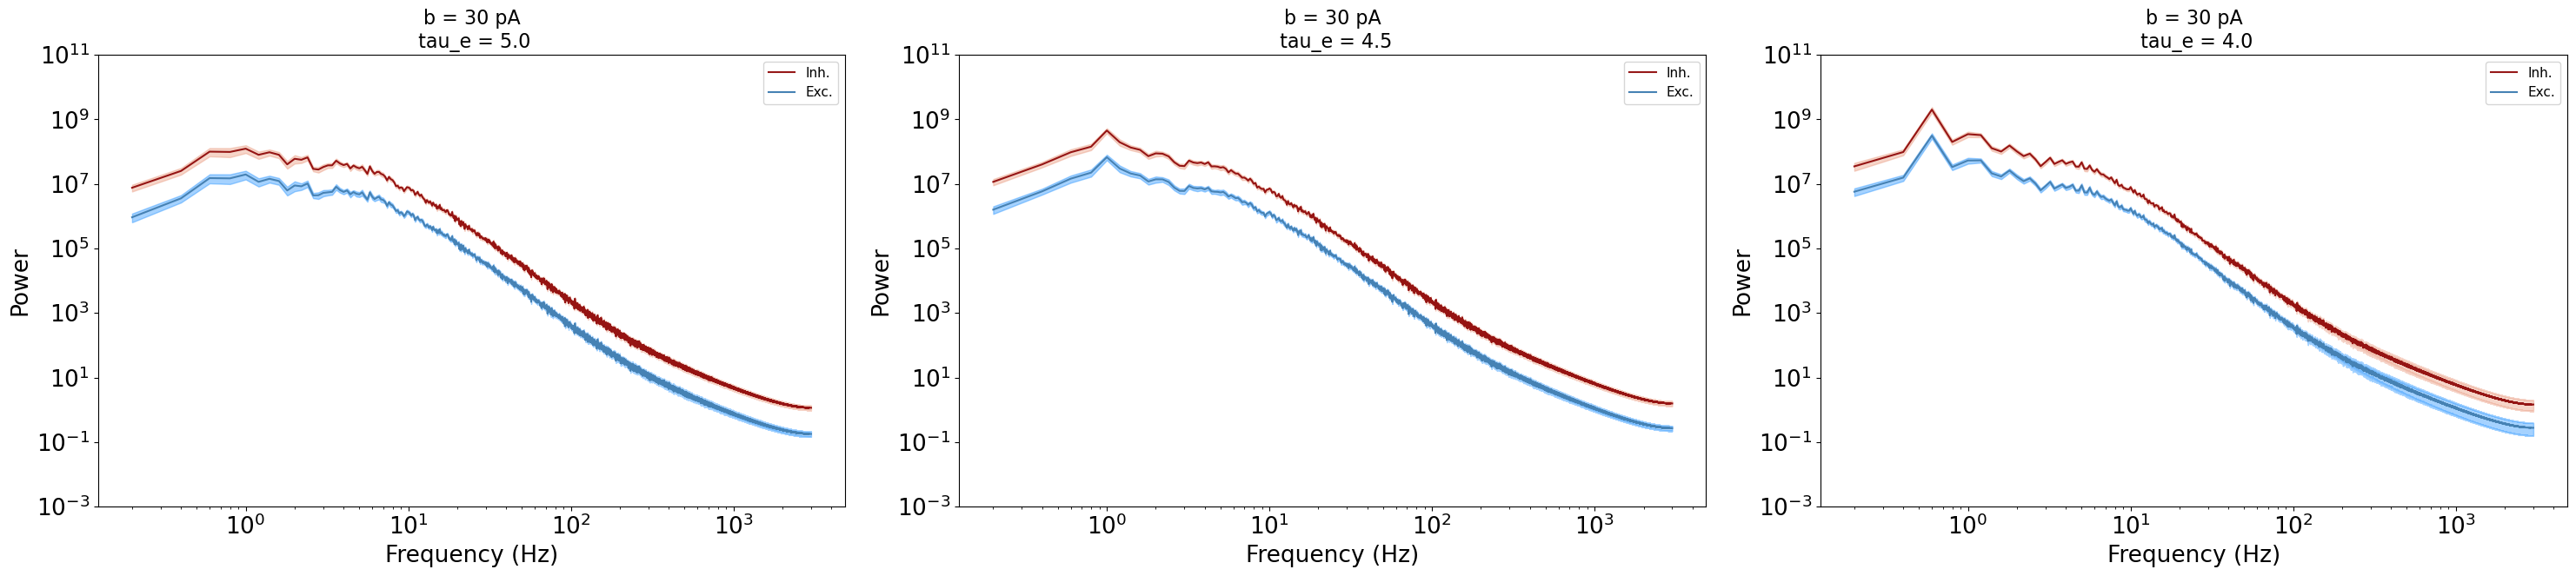

In [49]:
#%% plot power spectrum mean and std over regions

rows =int(len(tau_es))
cols =int(len(bvals))
    
if cols==1:
    fig, axes = plt.subplots(cols,rows,figsize=(30,7))        
else:
    fig, axes = plt.subplots(rows,cols,figsize=(30,15))
    
plt.rcParams.update({'font.size': 19})

f_sampling = 1.*len(time_s)/time_s[-1] # time in seconds, f_sampling in Hz
frq = np.fft.fftfreq(len(time_s), 1/f_sampling)

pwr_region_E = []
pwr_region_I = []

for simbe in range(len(bvals)):
    for tau_val in range(len(tau_es)):

        Esig = np.transpose(FR_exc_psp[tau_val +  (rows*simbe)])
        Isig = np.transpose(FR_inh_psp[tau_val +  (rows*simbe)])

        nnodes = len(Esig)
        for e_reg in range(nnodes):
            pwr_region_E.append(np.abs(np.fft.fft(Esig[e_reg]))**2)
            pwr_region_I.append(np.abs(np.fft.fft(Isig[e_reg]))**2)

        mean_E_Hz = np.mean(pwr_region_E, axis=0)
        mean_I_Hz = np.mean(pwr_region_I, axis=0)

        std_e = np.std(pwr_region_E, axis=0) #std fft between regions
        std_i = np.std(pwr_region_I, axis=0) #std fft between regions

        high_e = mean_E_Hz[frq > 0]+std_e[frq > 0]/np.sqrt(nnodes)
        high_i = mean_I_Hz[frq > 0]+std_i[frq > 0]/np.sqrt(nnodes)

        low_e =  mean_E_Hz[frq > 0]-std_e[frq > 0]/np.sqrt(nnodes)
        low_i =  mean_I_Hz[frq > 0]-std_i[frq > 0]/np.sqrt(nnodes)
        
        if rows==1:
            axes[simbe].loglog(frq[frq > 0], mean_I_Hz[frq > 0], 'darkred', alpha=0.9, label='Inh.')
            axes[simbe].loglog(frq[frq > 0], mean_E_Hz[frq > 0], color='SteelBlue', label='Exc.')
            axes[simbe].fill_between(frq[frq > 0], high_i, low_i, color = 'DarkSalmon', alpha = 0.4)
            axes[simbe].fill_between(frq[frq > 0], high_e, low_e, color = 'DodgerBlue', alpha = 0.4)

            axes[simbe].set_xlabel('Frequency (Hz)')
            axes[simbe].set_ylabel('Power') 
            
            axes[simbe].set_title('tau_e = {1} ms\n b = {0} pA'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
            
            
        elif cols==1:
            axes[tau_val].loglog(frq[frq > 0], mean_I_Hz[frq > 0], 'darkred', alpha=0.9, label='Inh.')
            axes[tau_val].loglog(frq[frq > 0], mean_E_Hz[frq > 0], color='SteelBlue', label='Exc.')
            axes[tau_val].fill_between(frq[frq > 0], high_i, low_i, color = 'DarkSalmon', alpha = 0.4)
            axes[tau_val].fill_between(frq[frq > 0], high_e, low_e, color = 'DodgerBlue', alpha = 0.4)

            axes[tau_val].set_xlabel('Frequency (Hz)')
            axes[tau_val].set_ylabel('Power')
            
            axes[tau_val].set_title('b = {0} pA\n tau_e = {1}'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
        
        else:
            axes[tau_val,simbe].loglog(frq[frq > 0], mean_I_Hz[frq > 0], 'darkred', alpha=0.9, label='Inh.')
            axes[tau_val,simbe].loglog(frq[frq > 0], mean_E_Hz[frq > 0], color='SteelBlue', label='Exc.')
            axes[tau_val,simbe].fill_between(frq[frq > 0], high_i, low_i, color = 'DarkSalmon', alpha = 0.4)
            axes[tau_val,simbe].fill_between(frq[frq > 0], high_e, low_e, color = 'DodgerBlue', alpha = 0.4)

            axes[tau_val,simbe].set_xlabel('Frequency (Hz)')
            axes[tau_val,simbe].set_ylabel('Power') 
            
            if tau_val == 0:
                axes[tau_val,simbe].set_title('b = {0} pA\n tau_e = {1}'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
            else:
                axes[tau_val,simbe].set_title('tau_e = {0}'.format(tau_es[tau_val]), fontsize=16)

        #axes[simnum,simbe].legend(loc='upper left', fontsize='xx-small')

        for ax in axes.reshape(-1):
            ax.legend(loc='upper right', fontsize='xx-small')
            ax.set_ylim(10e-4,10e10)

#         if tau_val == 0:
#             axes[tau_val,simbe].set_title('b = {0} pA\n tau_e = {1}'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
#         else:
#             axes[tau_val,simbe].set_title('tau_e = {0}'.format(tau_es[tau_val]), fontsize=16)
    
plt.tight_layout()
#plt.legend(fontsize=9,loc='upper left')
plt.show()

### Functional connectivity matrices

In [67]:
# Choose the parameters of the results that you want for FC
bvals = [5, 30, 40]
tau_es = [5.0, 4.5, 4.0]
Iexts = [0.000315]

## Load simulation variables for video:

FR_exc_fc = []


for simbe in range(len(bvals)):
    for simnum in range(len(Iexts)):
        for tau_val in range(len(tau_es)):
            sim_name = '_b_e_'+str(bvals[simbe]) + '_Iext_'+str(Iexts[simnum])+ "_tau_e_" + str(tau_es[tau_val])+ "_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])+ '/'
            
            print ('... loading file: ' +  sim_name)       
            file_name =  ffolder_root + '/' + sim_name
            result = tools.get_result(file_name,cut_transient,run_sim)

            '''fill variables'''
            time_s = result[0][0]*1e-3 #from ms to sec
            FR_exc_fc.append(result[0][1][:,0,:]*1e3) # from KHz to Hz; Excitatory firing rate
            
            

... loading file: _b_e_5_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_5_Iext_0.000315_tau_e_4.5_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_5_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_30_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_30_Iext_0.000315_tau_e_4.5_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_30_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_40_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_40_Iext_0.000315_tau_e_4.5_El_e_-64.0_El_i_-65.0/
... loading file: _b_e_40_Iext_0.000315_tau_e_4.0_El_e_-64.0_El_i_-65.0/


In [54]:
corr_matrix.shape

(3, 3)

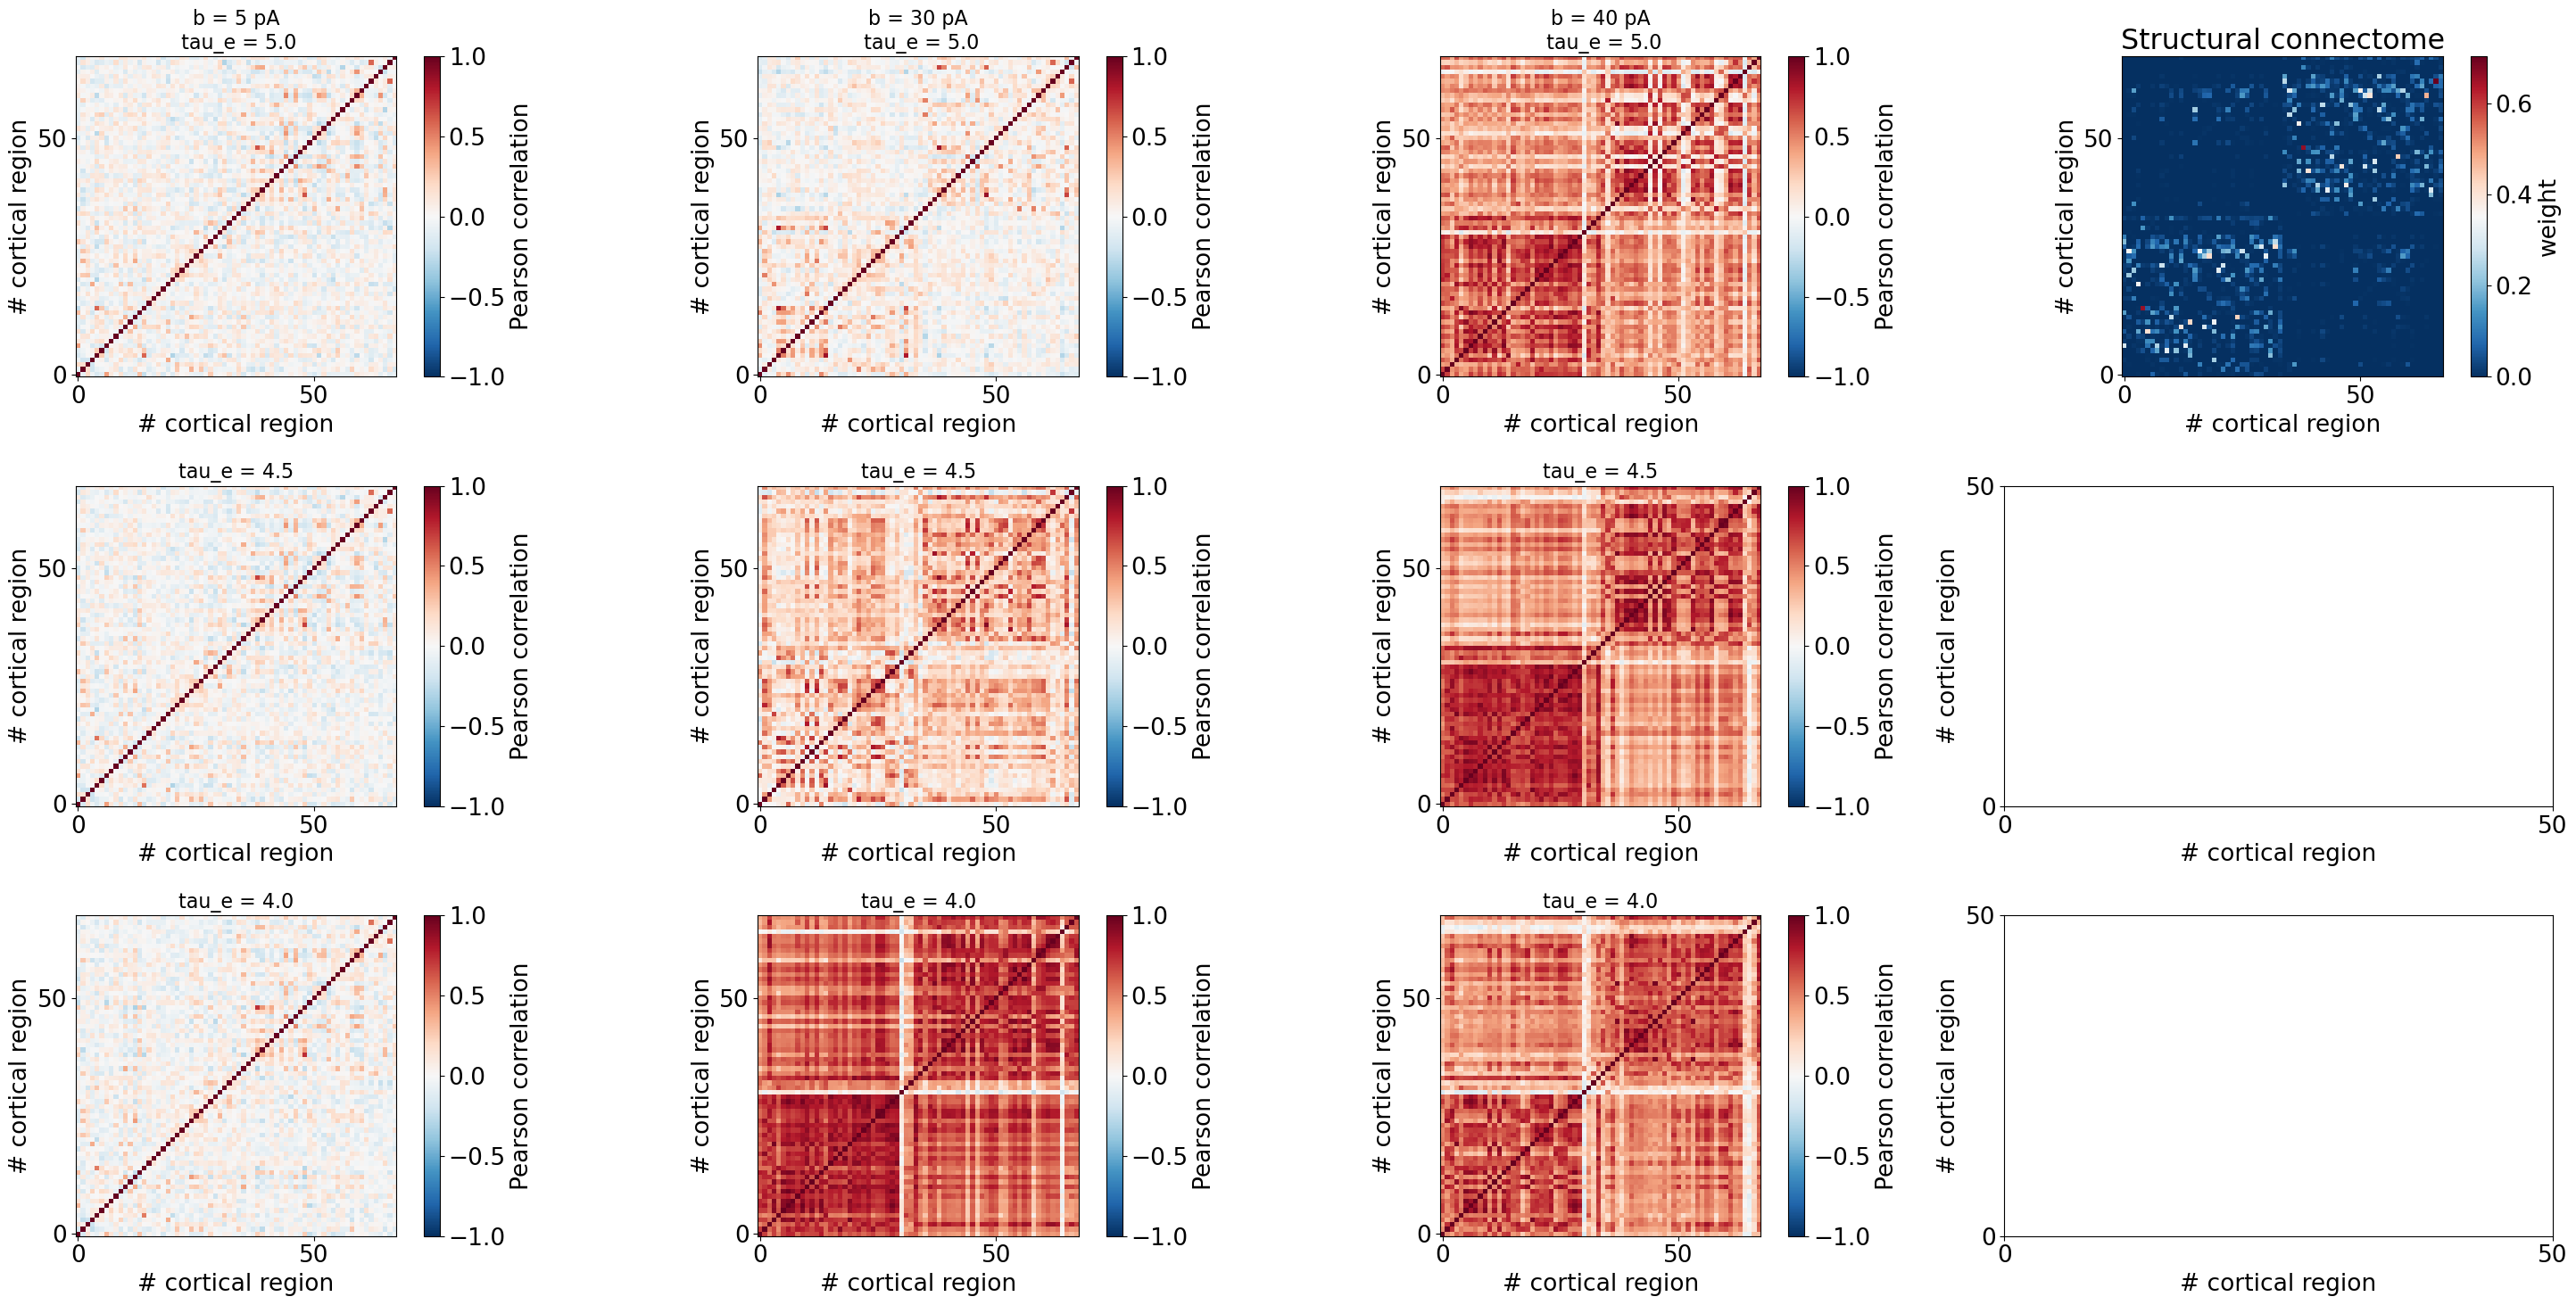

In [69]:

## plot pearson correlation functional connectivity matrices and the strucutural connectome weights:

rows =int(len(tau_es))
cols =int(len(bvals))
    
if cols==1:
    fig, axes = plt.subplots(cols,(rows+1),figsize=(30,7))        
else:
    fig, axes = plt.subplots(rows,(cols+1),figsize=(30,15))
    
plt.rcParams.update({'font.size': 19})

pearson_e = []

for simbe in range(len(bvals)):
    for tau_val in range(len(tau_es)):

    #for simnum in range(len(bvals)):
    #len(FR_exc_fc)=3 for the 3 values of tau
    #FR_exc_fc[i].shape = 30000,68 -> 30000 fouts values for 68 regions
    #the pearson coef has shape 68,68
        pearson_e.append(np.corrcoef(np.transpose(FR_exc_fc[tau_val +  (rows*simbe)])))
        
        if rows==1:
        
            im1 = axes[simbe].imshow(pearson_e[tau_val +  (rows*simbe)], cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                   interpolation = 'nearest', origin='lower')
            fig.colorbar(im1, ax=axes[simbe],label='Pearson correlation') 
            axes[simbe].set_title('tau_e = {1} ms\n b = {0} pA'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
            
            if simbe==(len(bvals)-1):
                im2 = axes[len(bvals)].imshow(simulator.connectivity.weights, cmap = 'RdBu_r', interpolation = 'nearest', origin='lower')
                fig.colorbar(im2, ax=axes[len(bvals)], label='weight')

                axes[len(bvals)].set_xlabel('# cortical region')
                axes[len(bvals)].set_ylabel('# cortical region') 
                axes[len(bvals)].set_title('Structural connectome')
        
        elif cols==1:
        
            im1 = axes[tau_val].imshow(pearson_e[tau_val +  (rows*simbe)], cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                   interpolation = 'nearest', origin='lower')
            fig.colorbar(im1, ax=axes[tau_val],label='Pearson correlation') 
            axes[tau_val].set_title('b = {0} pA\n tau_e = {1}'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
            
            if tau_val==(len(tau_es)-1):
                im2 = axes[len(tau_es)].imshow(simulator.connectivity.weights, cmap = 'RdBu_r', interpolation = 'nearest', origin='lower')
                fig.colorbar(im2, ax=axes[len(tau_es)], label='weight')

                axes[len(tau_es)].set_xlabel('# cortical region')
                axes[len(tau_es)].set_ylabel('# cortical region') 
                axes[len(tau_es)].set_title('Structural connectome')
        
        else:
            im1 = axes[tau_val,simbe].imshow(pearson_e[tau_val +  (rows*simbe)], cmap = 'RdBu_r', vmin = -1, vmax = 1, 
                   interpolation = 'nearest', origin='lower')
            fig.colorbar(im1, ax=axes[tau_val,simbe],label='Pearson correlation') 
            
            if tau_val == 0:
                axes[tau_val,simbe].set_title('b = {0} pA\n tau_e = {1}'.format(bvals[simbe],tau_es[tau_val]), fontsize=16)
            else:
                axes[tau_val,simbe].set_title('tau_e = {0}'.format(tau_es[tau_val]), fontsize=16)
            
            if tau_val==(len(tau_es)-1) and simbe==(len(bvals)-1):
                im2 = axes[0,simbe+1].imshow(simulator.connectivity.weights, cmap = 'RdBu_r', interpolation = 'nearest', origin='lower')
                fig.colorbar(im2, ax=axes[0,simbe+1], label='weight')

                axes[0,simbe+1].set_xlabel('# cortical region')
                axes[0,simbe+1].set_ylabel('# cortical region') 
                axes[0,simbe+1].set_title('Structural connectome')
            

    for ax in axes.reshape(-1):
        ax.set_xlabel('# cortical region')
        ax.set_ylabel('# cortical region')
        ax.set_xticks([0,50])
        ax.set_yticks([0,50])

# im2 = axes[2].imshow(simulator.connectivity.weights, cmap = 'RdBu_r', interpolation = 'nearest', origin='lower')
# fig.colorbar(im2, ax=axes[2], label='weight')

# axes[2].set_xlabel('# cortical region')
# axes[2].set_ylabel('# cortical region') 
# axes[2].set_title('Structural connectome')

plt.tight_layout()
plt.show()
